# 1- Importação de Fertilizantes por Município da Região de Pouso Alegre

In [1]:
%run '~/git/Bibliotecas.ipynb'

In [2]:
i_f_m_r_pa=pd.read_csv('~/git/comex_sh_mun/temp/i_f_m_r_pa.csv')

In [3]:
i_f_m_r_pa.head(1)

,CO_MUN,NO_MUN,NO_MUN_MIN,SG_UF,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,KG_LIQUIDO,VL_FOB,NO_SH4_POR,CO_SH2,NO_SH2_POR
0,3125101,EXTREMA,Extrema,MG,2003,9,3105,493,MG,1000,323,"Adubos (fertilizantes) minerais ou químicos, c...",31,Adubos (fertilizantes)


Eliminando SH4 com número de importações irrelevante desde 2017 

In [4]:
i_f_m_r_pa[i_f_m_r_pa.CO_ANO>2017].groupby('SH4').KG_LIQUIDO.sum().sort_values()

SH4
3101       198647
3103      4300000
3105    100583161
3104    230500447
3102    353202980
Name: KG_LIQUIDO, dtype: int64

In [5]:
i_f_m_r_pa[i_f_m_r_pa.CO_ANO>2017].groupby('SH4').KG_LIQUIDO.count().sort_values()

SH4
3103      3
3101      6
3105     62
3104     96
3102    164
Name: KG_LIQUIDO, dtype: int64

In [6]:
sh4s=i_f_m_r_pa[i_f_m_r_pa.CO_ANO>2017].groupby('SH4').KG_LIQUIDO.count().sort_values().reset_index()['SH4'].tail(3).values
sh4s

array([3105, 3104, 3102])

In [7]:
i_f_m_r_pa=i_f_m_r_pa[i_f_m_r_pa.SH4.isin(sh4s)]

In [8]:
i_f_m_r_pa.SH4.unique()

array([3105, 3102, 3104])

Correção da Inflação

In [9]:
# Cria manualmente a tabela de correção do dólar
infl_dolar=pd.DataFrame({
 'CO_ANO':np.arange(1997,2025),
 'FATOR':[0.50,0.50,0.51,0.53,0.55,0.56,0.57,0.59,0.61,\
 0.63,0.64,0.67,0.67,0.68,0.70,0.72,0.73,0.74,\
 0.74,0.75,0.77,0.78,0.80,0.81,0.85,0.92,0.96,1.00]})

i_f_m_r_pa=i_f_m_r_pa.merge(infl_dolar)

#Armazena valor histórico em nova coluna
i_f_m_r_pa['KG_LIQUIDO_real']=i_f_m_r_pa['KG_LIQUIDO']

# Atualiza valor monetário
i_f_m_r_pa['KG_LIQUIDO']=i_f_m_r_pa['KG_LIQUIDO']/i_f_m_r_pa['FATOR']

In [10]:
i_f_m_r_pa[i_f_m_r_pa.duplicated()]

,CO_MUN,NO_MUN,NO_MUN_MIN,SG_UF,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,KG_LIQUIDO,VL_FOB,NO_SH4_POR,CO_SH2,NO_SH2_POR,FATOR,KG_LIQUIDO_real


In [11]:
i_f_m_r_pa[i_f_m_r_pa.duplicated(subset=['CO_MUN','CO_ANO','CO_MES','SH4','CO_PAIS'])]

,CO_MUN,NO_MUN,NO_MUN_MIN,SG_UF,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,KG_LIQUIDO,VL_FOB,NO_SH4_POR,CO_SH2,NO_SH2_POR,FATOR,KG_LIQUIDO_real


In [12]:
i_f_m_r_pa[i_f_m_r_pa.KG_LIQUIDO<=0]

,CO_MUN,NO_MUN,NO_MUN_MIN,SG_UF,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,KG_LIQUIDO,VL_FOB,NO_SH4_POR,CO_SH2,NO_SH2_POR,FATOR,KG_LIQUIDO_real
346,3152501,POUSO ALEGRE,Pouso Alegre,MG,2009,2,3102,628,MG,0.0,348,"Adubos (fertilizantes) minerais ou químicos, a...",31,Adubos (fertilizantes),0.67,0


Como o registro com 0 KG apresenta também o valor em US$ desprezível, ele será descartado.

In [13]:
i_f_m_r_pa=i_f_m_r_pa[i_f_m_r_pa.KG_LIQUIDO>0]

In [14]:
i_f_m_r_pa[i_f_m_r_pa.VL_FOB<=0]

,CO_MUN,NO_MUN,NO_MUN_MIN,SG_UF,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,KG_LIQUIDO,VL_FOB,NO_SH4_POR,CO_SH2,NO_SH2_POR,FATOR,KG_LIQUIDO_real


In [15]:
i_f_m_r_pa.head(1)

,CO_MUN,NO_MUN,NO_MUN_MIN,SG_UF,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,KG_LIQUIDO,VL_FOB,NO_SH4_POR,CO_SH2,NO_SH2_POR,FATOR,KG_LIQUIDO_real
0,3125101,EXTREMA,Extrema,MG,2003,9,3105,493,MG,1754.385965,323,"Adubos (fertilizantes) minerais ou químicos, c...",31,Adubos (fertilizantes),0.57,1000


In [16]:
i_f_m_r_pa=i_f_m_r_pa[i_f_m_r_pa.columns[[4,5,1,6,7,9,10]]]

In [17]:
i_f_m_r_pa

,CO_ANO,CO_MES,NO_MUN,SH4,CO_PAIS,KG_LIQUIDO,VL_FOB
0,2003,9,EXTREMA,3105,493,1.754386e+03,323
1,2003,8,EXTREMA,3105,493,1.403509e+02,25
2,2003,3,CONGONHAL,3104,149,4.385965e+06,285075
3,2003,7,CONGONHAL,3104,676,3.340702e+06,199779
4,2003,11,CONGONHAL,3102,676,8.643333e+06,603064
...,...,...,...,...,...,...,...
877,2021,6,POUSO ALEGRE,3105,160,3.546778e+06,1475018
878,2021,11,POUSO ALEGRE,3105,249,9.384706e+03,40612
879,2021,8,POUSO ALEGRE,3104,85,6.490094e+06,1760962
880,2021,10,POUSO ALEGRE,3102,59,6.355552e+06,2324194


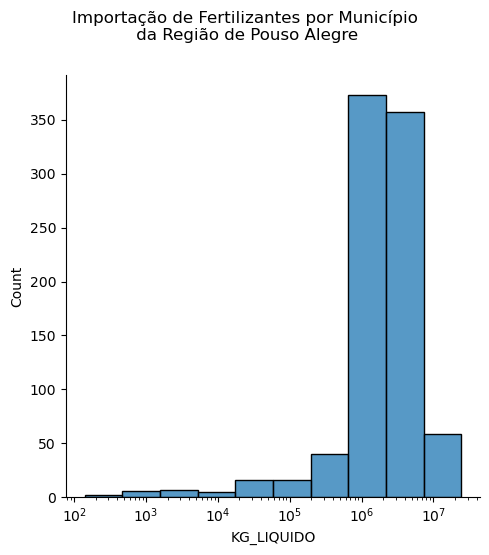

In [18]:
sns.displot(data=i_f_m_r_pa,x='KG_LIQUIDO',log_scale=True,bins=10)\
.fig.suptitle('Importação de Fertilizantes por Município\n da Região de Pouso Alegre',y=1.1)
plt.show()

Os valores formam considerados normais.

In [19]:
i_f_m_r_pa=i_f_m_r_pa.assign(descarte_peso='não')

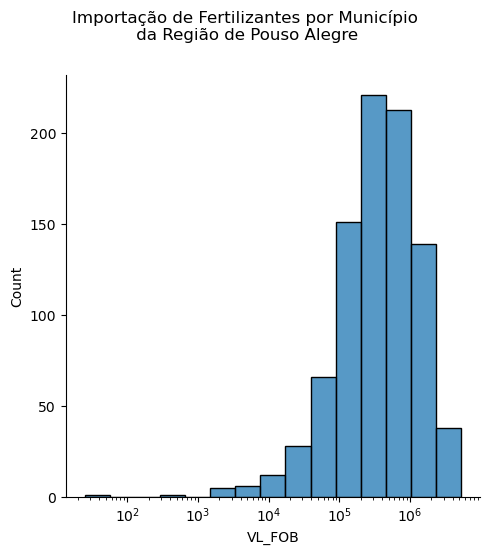

In [20]:
sns.displot(data=i_f_m_r_pa,x='VL_FOB',log_scale=True, bins=15)\
.fig.suptitle('Importação de Fertilizantes por Município\n da Região de Pouso Alegre',y=1.1)
plt.show()

Os valores formam considerados normais.

In [21]:
i_f_m_r_pa=i_f_m_r_pa.assign(descarte_vl='não')

In [22]:
i_f_m_r_pa['US$/KG']=i_f_m_r_pa.VL_FOB/i_f_m_r_pa.KG_LIQUIDO

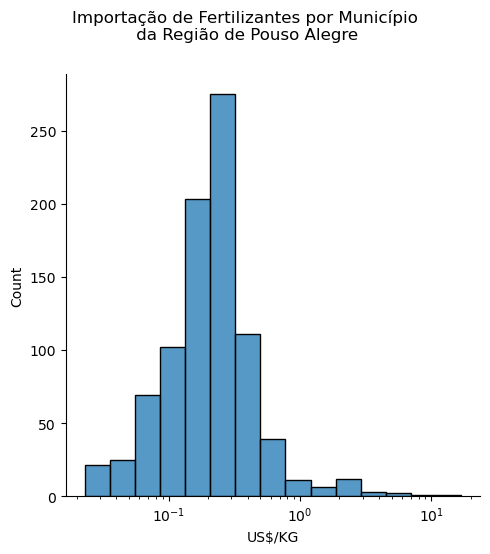

In [23]:
sns.displot(data=i_f_m_r_pa,x='US$/KG',log_scale=True, bins=15)\
.fig.suptitle('Importação de Fertilizantes por Município\n da Região de Pouso Alegre',y=1.1)
plt.show()

Os valores acima de 10**0 foram considerados anormais e serão marcados para descarte.

In [24]:
i_f_m_r_pa=i_f_m_r_pa.assign(descarte_preço='não')

In [25]:
i_f_m_r_pa.loc[i_f_m_r_pa['US$/KG']>10**0,'descarte_preço']='sim'

In [26]:
i_f_m_r_pa[
(i_f_m_r_pa.descarte_peso=='sim')&
(i_f_m_r_pa.descarte_vl=='sim')&
(i_f_m_r_pa.descarte_preço=='sim')
].tipo='descarte_triplo'

In [27]:
i_f_m_r_pa['tipo']='sem_descarte'

i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='sim')&(i_f_m_r_pa.descarte_vl=='sim')&(i_f_m_r_pa.descarte_preço=='sim'),'tipo']='descarte_triplo'

i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='não')&(i_f_m_r_pa.descarte_vl=='sim')&(i_f_m_r_pa.descarte_preço=='sim'),'tipo']='descarte_vl_preço'

i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='sim')&(i_f_m_r_pa.descarte_vl=='não')&(i_f_m_r_pa.descarte_preço=='sim'),'tipo']='descarte_peso_preço'

i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='não')&(i_f_m_r_pa.descarte_vl=='sim')&(i_f_m_r_pa.descarte_preço=='sim'),'tipo']='descarte_vl_preço'

i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='não')&(i_f_m_r_pa.descarte_vl=='não')&(i_f_m_r_pa.descarte_preço=='sim'),'tipo']='descarte_preço'

i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='sim')&(i_f_m_r_pa.descarte_vl=='não')&(i_f_m_r_pa.descarte_preço=='não'),'tipo']='descarte_peso'


i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='não')&(i_f_m_r_pa.descarte_vl=='sim')&(i_f_m_r_pa.descarte_preço=='não'),'tipo']='descarte_vl'

i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='não')&(i_f_m_r_pa.descarte_vl=='não')&(i_f_m_r_pa.descarte_preço=='não'),'tipo']='sem_descarte'

w=i_f_m_r_pa.copy()

i_f_m_r_pa=i_f_m_r_pa[i_f_m_r_pa.tipo!='descarte_triplo']

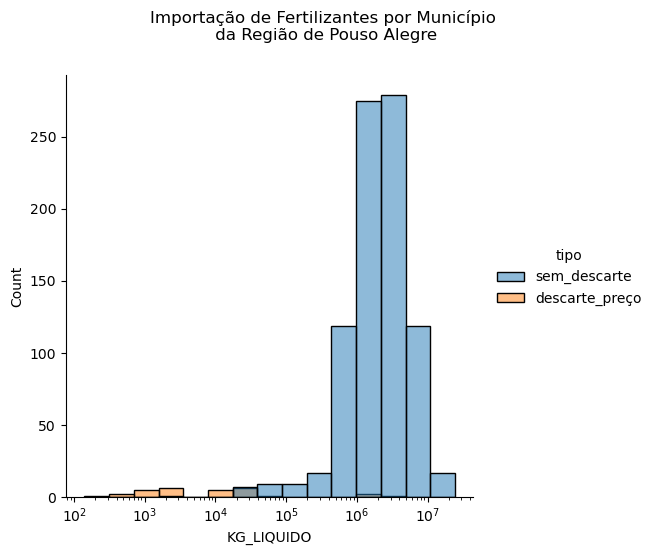

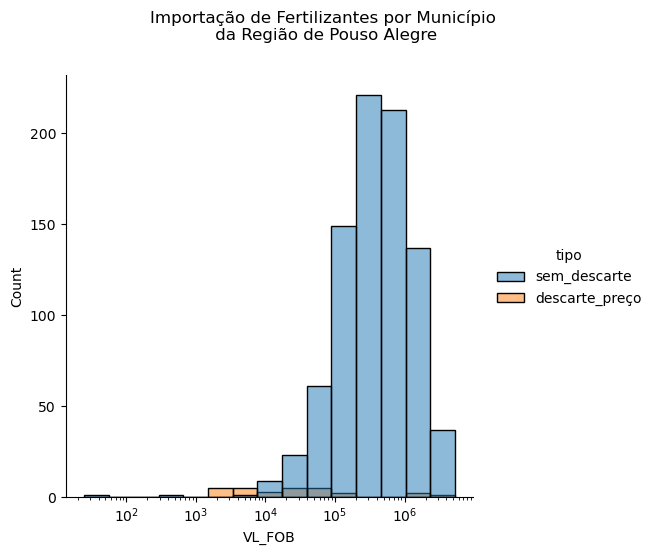

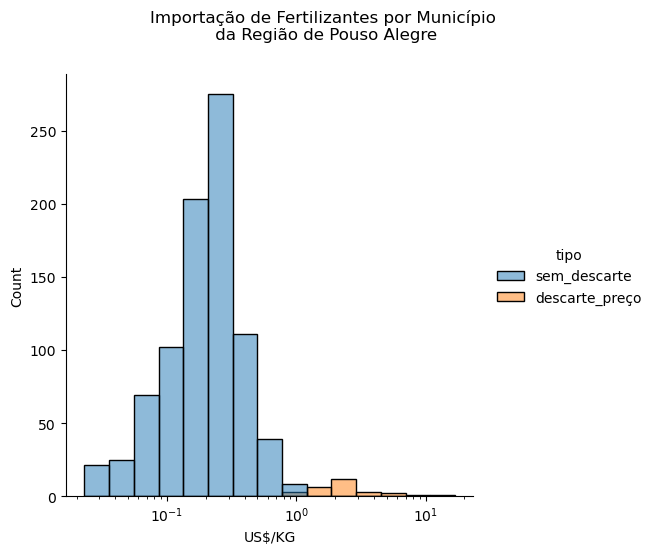

In [28]:
for c in ['KG_LIQUIDO','VL_FOB','US$/KG']:
    sns.displot(data=i_f_m_r_pa,x=c,log_scale=True, hue='tipo', bins=15).fig.suptitle('Importação de Fertilizantes por Município\n da Região de Pouso Alegre',y=1.1)
    plt.show()

In [29]:
i_f_m_r_pa_sem_descarte=i_f_m_r_pa[i_f_m_r_pa.tipo=='sem_descarte']

In [30]:
i_f_m_r_pa_com_descarte=i_f_m_r_pa[i_f_m_r_pa.tipo!='sem_descarte']

In [31]:
print(f"Os registros com algum tipo de descarte correspondem a {round(100*len(i_f_m_r_pa_com_descarte)/(len(i_f_m_r_pa_com_descarte)+len(i_f_m_r_pa_sem_descarte)))} % do total de registros.")

Os registros com algum tipo de descarte correspondem a 3 % do total de registros.


In [32]:
print(f"Os registros com algum tipo de descarte correspondem a {round(100*(i_f_m_r_pa_com_descarte.KG_LIQUIDO.sum())/((i_f_m_r_pa_com_descarte.KG_LIQUIDO.sum())+(i_f_m_r_pa_sem_descarte.KG_LIQUIDO.sum())))} % do total do peso.")

Os registros com algum tipo de descarte correspondem a 0 % do total do peso.


In [33]:
print(f"Os registros com algum tipo de descarte correspondem a {round(100*(i_f_m_r_pa_com_descarte.VL_FOB.sum())/((i_f_m_r_pa_com_descarte.VL_FOB.sum())+(i_f_m_r_pa_sem_descarte.VL_FOB.sum())))} % do total do valor FOB.")

Os registros com algum tipo de descarte correspondem a 1 % do total do valor FOB.


In [34]:
i_f_m_r_pa_clean=pd.concat([i_f_m_r_pa_sem_descarte])#,i_f_m_r_pa_com_descarte_2_sem_na,i_f_m_r_pa_com_descarte_2_com_na])

In [35]:
i_f_m_r_pa_clean.head(1)

,CO_ANO,CO_MES,NO_MUN,SH4,CO_PAIS,KG_LIQUIDO,VL_FOB,descarte_peso,descarte_vl,US$/KG,descarte_preço,tipo
0,2003,9,EXTREMA,3105,493,1754.385965,323,não,não,0.18411,não,sem_descarte


In [36]:
i_f_m_r_pa_clean=i_f_m_r_pa_clean.iloc[:,:7]

In [37]:
i_f_m_r_pa_clean.head(1)

,CO_ANO,CO_MES,NO_MUN,SH4,CO_PAIS,KG_LIQUIDO,VL_FOB
0,2003,9,EXTREMA,3105,493,1754.385965,323


In [38]:
outros_paises=i_f_m_r_pa_clean.groupby('CO_PAIS').KG_LIQUIDO.sum().sort_values().reset_index()
outros_paises=outros_paises[i_f_m_r_pa_clean.KG_LIQUIDO<10**6]['CO_PAIS'].to_list()

In [39]:
pd.read_csv('~/git/BD/Comexstat/PAIS.csv', sep=';',encoding='Latin-1').tail(10)

,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
271,875,876,WLF,"Wallis e Futuna, Ilhas",Wallis and Futuna,Wallis y Futuna
272,888,180,COD,"Congo, República Democrática",Democratic Republic of the Congo,República Democrática del Congo
273,890,894,ZMB,Zâmbia,Zambia,Zambia
274,895,592,PCZ,Zona do Canal do Panamá,Panama Canal Zone,Zona del Canal de Panamá
275,990,898,ZZZ,Provisão de Navios e Aeronaves,Planes and ships provisions,Disposiciones para buques y aviones
276,994,898,ZZZ,A Designar,To define,A designar
277,995,898,ZZZ,Bancos Centrais,Central Banks,Bancos Centrales
278,997,898,ZZZ,Organizações Internacionais,International Organizations,Organizaciones Internacionales
279,998,898,ZZZ,Sem informação,Sem informação,Sem informação
280,999,898,ZZZ,Não Declarados,Not declared,No declarados


In [40]:
i_f_m_r_pa_clean.loc[i_f_m_r_pa_clean.CO_PAIS.isin(outros_paises),'CO_PAIS']=999

In [41]:
i_f_m_r_pa_clean=i_f_m_r_pa_clean.rename(columns={'NO_MUN':'NO_MUN_i_f','SH4':'SH4_f','CO_PAIS':'CO_PAIS_e_f','KG_LIQUIDO':'KG_f','VL_FOB':'VL_f'})

In [42]:
i_f_m_r_pa_clean.to_csv('~/git/comex_sh_mun/temp/i_f_m_r_pa_clean.csv',index=False)